In [2]:
from fbprophet import Prophet
import pandas as pd
import numpy as np

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 15, 6
rcParams['axes.labelsize'] = 12
rcParams['xtick.labelsize'] = 10
rcParams['ytick.labelsize'] = 10
plt.style.use('fivethirtyeight')
rcParams['text.color'] = 'k'

In [5]:
data = pd.read_csv('/home/prodigalson/J Files/Project - Time Series/data.csv',sep=';')

In [6]:
data['DOR'] = pd.to_datetime(data['DOR'])
data.head()

,Name,Sex,Age,Area,DOR
0,UNNIKRISHNAN,M,17.0,CORPORATION,2013-01-01
1,MURAMMIL,M,6.0,ANDOORKONAM,2013-01-01
2,RAJAMMA,F,50.0,BALARAMAPURAM,2013-01-01
3,ANJU,F,15.0,CORPORATION,2013-01-01
4,THANKAMANI,F,43.0,POOZHANAD,2013-01-01


In [7]:
data['MnthWse'] = data['DOR'].map(lambda x: x.strftime('%Y-%m'))
sumry = pd.DataFrame(data.MnthWse.value_counts().sort_index()).reset_index()
sumry.columns = ['MnthWse', 'Cnt']
# sumry['MnthWse'] = pd.to_datetime(sumry['MnthWse'], format='%Y-%m')
# sumry['MnthWse'] = sumry['MnthWse'].map(lambda x: x.strftime('%Y-%m'))
sumry['MnthWse'] = pd.to_datetime(sumry.MnthWse)
sumry = sumry.set_index(sumry.MnthWse)
sumry.drop('MnthWse', axis = 1, inplace = True)

In [8]:
sumry.head()

,Cnt
MnthWse,
2013-01-01,224
2013-02-01,217
2013-03-01,238
2013-04-01,324
2013-05-01,456


In [9]:
sumry = sumry.rename_axis('MnthWse').reset_index()

In [10]:
ts = sumry.rename(columns={'MnthWse': 'ds', 'Cnt': 'y'})

In [11]:
ts

,ds,y
0,2013-01-01,224
1,2013-02-01,217
2,2013-03-01,238
3,2013-04-01,324
4,2013-05-01,456
...,...,...
67,2018-08-01,27
68,2018-09-01,24
69,2018-10-01,23
70,2018-11-01,32


In [33]:
ts_model = Prophet(interval_width=0.95)
ts_model.fit(ts)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [34]:
ts__forecast = ts_model.make_future_dataframe(periods=36, freq='MS')
ts_forecast = ts_model.predict(ts__forecast)

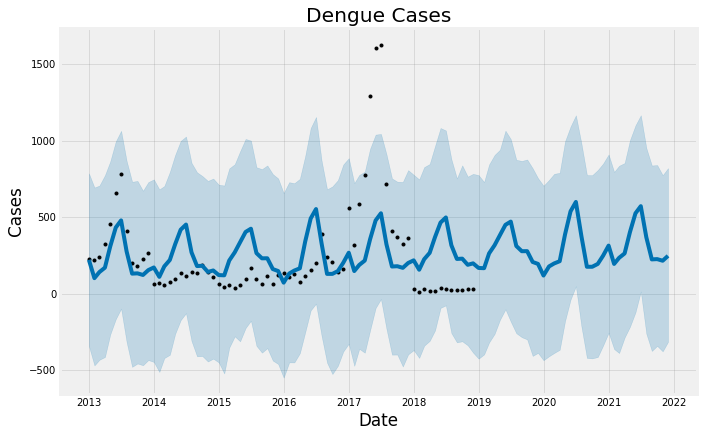

In [35]:
ts_model.plot(ts_forecast, xlabel = 'Date', ylabel = 'Cases')
plt.title('Dengue Cases');

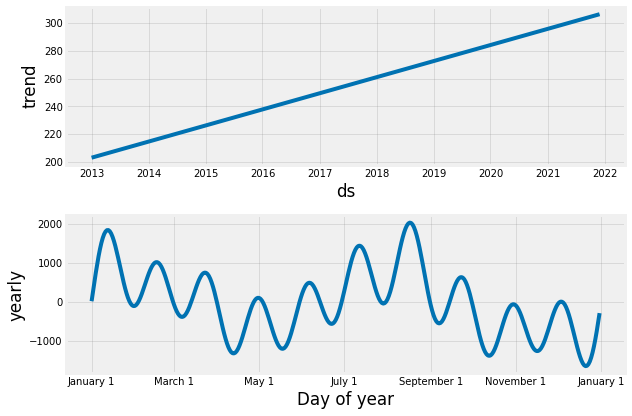

In [36]:
fig = ts_model.plot_components(forecast)

In [37]:
ts_forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
103,2021-08-01,369.188300,-260.477346,952.344954
104,2021-09-01,224.204436,-373.992474,837.591820
105,2021-10-01,226.039761,-340.837046,840.519181
106,2021-11-01,215.507871,-376.544689,774.158393
107,2021-12-01,247.203915,-314.465317,820.410641


In [38]:
from fbprophet.plot import plot_plotly, plot_components_plotly

In [39]:
plot_plotly(ts_model, ts_forecast)

In [40]:
plot_components_plotly(ts_model, ts_forecast)